In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

image_size = (120, 160)
batch_size =128


train_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/train"
test_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/test"
valid_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/validation"


num_classes = 14

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(120, 160,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (2, 2), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

Found 1310 images belonging to 14 classes.
Found 660 images belonging to 14 classes.
Found 2658 images belonging to 14 classes.


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 118, 158, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 79, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 57, 77, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 38, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 27, 37, 256)       131328    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 18, 256)     

In [6]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0.001, 
    patience=10, 
    verbose=1, 
    mode='auto',
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[earlystop_callback]
)


Epoch 1/100


2023-03-12 22:36:05.037534: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 37s 4s/step - loss: 3.3096 - accuracy: 0.2885 - val_loss: 2.7369 - val_accuracy: 0.3313
Epoch 2/100
10/10 [==============================] - 36s 4s/step - loss: 2.5871 - accuracy: 0.4687 - val_loss: 2.3049 - val_accuracy: 0.6062
Epoch 3/100
10/10 [==============================] - 38s 4s/step - loss: 1.9766 - accuracy: 0.6083 - val_loss: 1.7678 - val_accuracy: 0.6125
Epoch 4/100
10/10 [==============================] - 38s 4s/step - loss: 1.6909 - accuracy: 0.6345 - val_loss: 1.5530 - val_accuracy: 0.6578
Epoch 5/100
10/10 [==============================] - 41s 4s/step - loss: 1.5080 - accuracy: 0.6672 - val_loss: 1.4100 - val_accuracy: 0.6859
Epoch 6/100
10/10 [==============================] - 37s 4s/step - loss: 1.3393 - accuracy: 0.7107 - val_loss: 1.2252 - val_accuracy: 0.7172
Epoch 7/100
10/10 [==============================] - 38s 4s/step - loss: 1.1665 - accuracy: 0.7293 - val_loss: 1.0709 - val_accuracy: 0.7391
Epoch 8/100
10/10 [======

Epoch 59/100
10/10 [==============================] - 39s 4s/step - loss: 0.2619 - accuracy: 0.9636 - val_loss: 0.5539 - val_accuracy: 0.9094
Epoch 60/100
10/10 [==============================] - 39s 4s/step - loss: 0.2366 - accuracy: 0.9704 - val_loss: 0.5234 - val_accuracy: 0.9219
Epoch 60: early stopping


In [7]:
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

21/21 [==============================] - 14s 671ms/step - loss: 0.4901 - accuracy: 0.9349
Test loss: 0.4901471734046936
Test accuracy: 0.9349134564399719


In [8]:
model.save('/Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers')

INFO:tensorflow:Assets written to: /Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers/assets


INFO:tensorflow:Assets written to: /Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers/assets


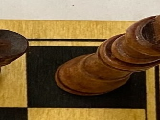

In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/Users/zuzannaszubartowska/code/crop_colour/puzzle/blackking/puzzle1-crop7.jpeg'
img = load_img(img_path, target_size=(120, 160))

img_array = img_to_array(img)

img

In [59]:
import numpy as np

img_array /= 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)

class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]


print("Predicted class label: ", predicted_class_label)

1/1 [==============================] - 0s 26ms/step
Predicted class label:  blackqueen
